<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Cours APN - Labo 1 : Groupement de clients avec _k_-moyennes

Le but de ce laboratoire est de diviser en groupes cohérents les clients d'un centre commercial, en utilisant la méthode des [_k_-moyennes implémentée dans Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Les données viennent de Kaggle: [Mall Customer Segmentation](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python) (fournies avec le notebook).  Il n'y a pas d'annotation de référence des groupes, donc ce sera à vous de juger leur qualité grâce à la visualisation.  

Le travail comporte les étapes suivantes :
1. Analyse exploratoire des données.
2. Application simple des _k_-moyennes en 2D.
3. Améliorations: optimisation du nombre de groupes, 3D.

Veuillez répondre aux questions de chaque étape en écrivant d'abord les commandes nécessaires, puis en commentant le résultat si nécessaire.

Il est conseillé de créer un nouvel environnement Conda pour le cours d'APN, par exemple en utilisant la commande `conda create -n cours_apn --file requirements.txt`.  Le fichier _requirements.txt_ fourni avec le notebook liste les packages à installer. 

***
**NOM et prénom :** ANCAY Rémi et CHARBONNIER Lucas
***

In [79]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltF
from sklearn.cluster import KMeans

## 1. Analyse exploratoire des données

Veuillez lire les données du fichier `Mail_Customers.csv` dans une *data frame* Pandas nommée `clients_df` et examinez-la.  Veuillez répondre aux questions suivantes en utilisant les commandes appropriées.

a. Combien de clients figurent dans les données ?<br>
b. Combien d'attributs y a-t-il pour chaque client ?  Quels sont leurs noms ?<br>
c. Y a-t-il des données manquantes ?<br>
d. Quel est le *5 number summary* pour chaque attribut?

In [80]:
client_df = pd.read_csv("Mall_Customers.csv")

client_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
# A) Nombre de client
print("A) Nombre de clients : ", len(client_df))

# B) Combien d'attributs y a-t-il pour chaque client ?  Quels sont leurs noms ?
print("B) Nombre d'attributs : ", len(client_df.columns))
print("B) Nom des attributs : ", client_df.columns.values)

# C) Y a-t-il des données manquantes ?
print("C) Données manquantes : ", client_df.isnull().sum().sum())

# D) Quel est le 5 number summary pour chaque attribut?
print("D) 5 number summary : ")
print(client_df.describe())

# Describe de la colonne gender
print("D) Gender : ")
print(client_df["Gender"].describe())



A) Nombre de client :  200
B) Nombre d'attributs :  5
B) Nom des attributs :  ['CustomerID' 'Gender' 'Age' 'Annual Income (k$)' 'Spending Score (1-100)']
C) Données manquantes :  0
D) 5 number summary : 
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
D) Gender : 
count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object


e. Combien de personnes sont des femmes, et combien des hommes ?<br>
f. Quel est le revenu annuel moyen par sexe ? Quel est le *spending score* moyen par sexe ?<br>
g. Quelles sont les valeurs extrêmes de l'âge pour les femmes ? Et pour les hommes ?<br>
h. Même question pour le revenu annuel, puis pour le *spending score*.<br>

In [82]:
# E) Combien de personnes sont des femmes, et combien des hommes ?
print("E) Nombre de femmes et d'hommes : ")
print(client_df["Gender"].value_counts())
print()

# F) Quel est le revenu annuel moyen par sexe ? Quel est le *spending score* moyen par sexe ?
print("F) Revenu annuel moyen par sexe : ")
print(client_df.groupby("Gender")["Annual Income (k$)"].mean())

print("F) Spending score moyen par sexe : ")
print(client_df.groupby("Gender")["Spending Score (1-100)"].mean())

E) Nombre de femmes et d'hommes : 
Gender
Female    112
Male       88
Name: count, dtype: int64

F) Revenu annuel moyen par sexe : 
Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64
F) Spending score moyen par sexe : 
Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


In [83]:
# G) Quelles sont les valeurs extrêmes de l'âge pour les femmes ? Et pour les hommes ?
print("G) Valeurs Min de l'âge : ")
print(client_df.groupby("Gender")["Age"].min())

print("G) Valeurs Max de l'âge : ")
print(client_df.groupby("Gender")["Age"].max())

G) Valeurs Min de l'âge : 
Gender
Female    18
Male      18
Name: Age, dtype: int64
G) Valeurs Max de l'âge : 
Gender
Female    68
Male      70
Name: Age, dtype: int64


In [84]:
# H) Même question pour le revenu annuel, puis pour le *spending score*.
print("H) Valeurs Min du revenu annuel : ")
print(client_df.groupby("Gender")["Annual Income (k$)"].min())

print("H) Valeurs Max du revenu annuel : ")
print(client_df.groupby("Gender")["Annual Income (k$)"].max())
print()

print("H) Valeurs Min du spending score : ")
print(client_df.groupby("Gender")["Spending Score (1-100)"].min())

print("H) Valeurs Max du spending score : ")
print(client_df.groupby("Gender")["Spending Score (1-100)"].max())

H) Valeurs Min du revenu annuel : 
Gender
Female    16
Male      15
Name: Annual Income (k$), dtype: int64
H) Valeurs Max du revenu annuel : 
Gender
Female    126
Male      137
Name: Annual Income (k$), dtype: int64

H) Valeurs Min du spending score : 
Gender
Female    5
Male      1
Name: Spending Score (1-100), dtype: int64
H) Valeurs Max du spending score : 
Gender
Female    99
Male      97
Name: Spending Score (1-100), dtype: int64


## 2. Groupement simple avec la méthode des k-moyennes

### 2a. Groupement avec deux attributs, en trois groupes

Pour commencer, veuillez utiliser la méthode [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) avec initialisation aléatoire, un seul essai, et en fixant le nombre de groupes à trois (3).  De plus, veuillez utiliser seulement les colonnes 'Annual Income (k$)' et 'Spending Score (1-100)' des données.

In [85]:
client_kmeans = KMeans(n_clusters=3, init='random', n_init=1)
X = client_df[["Annual Income (k$)", "Spending Score (1-100)"]]

client_kmeans.fit(X)

KMeans(init='random', n_clusters=3, n_init=1)

Veuillez afficher les données en 2D (_annual income_ et _spending score_) en indiquant l'appartenance aux clusters par des couleurs différentes.  Veuillez utiliser des marqueurs différents pour les hommes et pour les femmes.

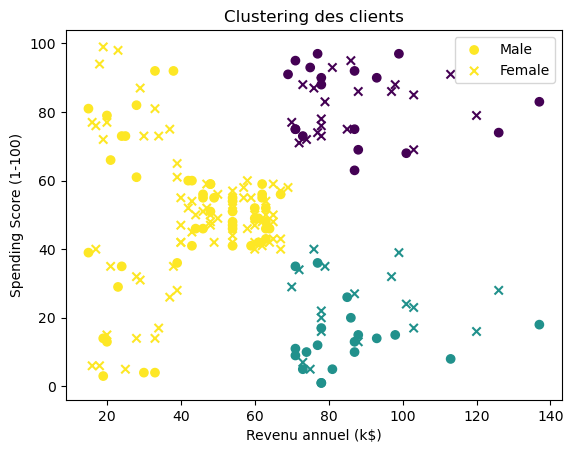

In [86]:
# Predict cluster
client_df["Cluster"] = client_kmeans.predict(X)

# Split dataframe into Male and Female
male_df = client_df[client_df["Gender"] == "Male"]
female_df = client_df[client_df["Gender"] == "Female"]


plt.figure()
plt.scatter(male_df["Annual Income (k$)"], male_df["Spending Score (1-100)"], c=male_df["Cluster"], marker="o", label="Male")
plt.scatter(female_df["Annual Income (k$)"], female_df["Spending Score (1-100)"], c=female_df["Cluster"], marker="x", label="Female")
plt.title("Clustering des clients")
plt.xlabel("Revenu annuel (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


**Question :** comment appréciez-vous la qualité du groupement obtenu ?  Veuillez la discuter. 

*Réponse :*

On peut voir que les clients sont regroupés en 3 groupes distincts :
- Clients ayant un revenu annuel faible (moins de 70k$)
- Clients ayant un revenu annuel plus élevé et un spending score faible
- Clients ayant un revenu annuel plus élevé et un spending score élevé

Le premier groupe est assez problématique car il regroupe des clients ayant un spending score très variable
Les deux autres groupes montrent que les clients fortunés sont divisés en deux groupes distincts :
Soit des clients dépensant peu, soit des clients dépensant beaucoup*

### 2b. Choix individuel d'un nombre de groupes plus adapté

Sur la base de la question précédente, veuillez effectuer le groupement avec le nombre de groupes qui vous semble le plus adapté, autre que 3.  Veuillez effectuer 10 initialisations aléatoires.

Pour l'affichage, veuillez afficher également les centroïdes des groupes (obtenus de `KMeans`), en utilisant une étoile noire. 

In [88]:
client_kmeans = KMeans(n_clusters=5, init='random', n_init=10)
X = client_df[["Annual Income (k$)", "Spending Score (1-100)"]]

client_kmeans.fit(X)

KMeans(init='random', n_clusters=5, n_init=10)

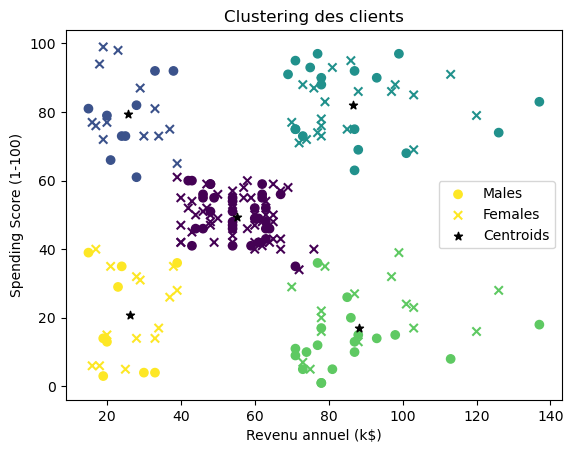

In [89]:
# Predict cluster
client_df["Cluster"] = client_kmeans.predict(X)
centroids = client_kmeans.cluster_centers_

# Split dataframe into Male and Female
male_df = client_df[client_df["Gender"] == "Male"]
female_df = client_df[client_df["Gender"] == "Female"]


plt.figure()
plt.scatter(male_df["Annual Income (k$)"], male_df["Spending Score (1-100)"], c=male_df["Cluster"], marker="o", label="Males")
plt.scatter(female_df["Annual Income (k$)"], female_df["Spending Score (1-100)"], c=female_df["Cluster"], marker="x", label="Females")
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', label='Centroids')
plt.title("Clustering des clients")
plt.xlabel("Revenu annuel (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


**Question :** comment appréciez-vous la qualité du nouveau groupement ?  Veuillez la discuter. 
    
Pouvez-vous décrire chaque groupe en fonction des valeurs des deux axes ?

*Réponse :*

On distingue ici 5 groupes de clients distincts :
1) Clients ayant un revenu annuel faible et un spending score faible
2) Clients ayant un revenu annuel faible et un spending score élevé
3) Clients ayant un revenu annuel moyen et un spending score moyen
4) Clients ayant un revenu annuel élevé et un spending score faible
5) Clients ayant un revenu annuel élevé et un spending score élevé

## 3. Groupements optimisés en 3D

Dans cette section, vous allez utiliser l'initialisation k-means++ (un seul tirage), et optimiser le nombre de groupes par la méthode du coude (_elbow_).  Puis, vous allez ajouter la dimension de l'âge et afficher les groupes en 3D.

### 3a. Méthode du coude et initialisation k-means++

Dans tout ce qui suit, vous allez initialiser les centroïdes avec k-means++ (paramètre `init`) et exécuter 5 fois l'algorithme des k-moyennes (paramètre `n_init`).

Veuillez afficher les valeurs du coefficient WSS (Within-cluster Sum of Squares) ou **inertie** pour un nombre de groupes variant de 1 à 9.  Travaillez pour l'instant en deux dimensions, comme avant.

WSS for 1 clusters: 269981.28000000014
WSS for 2 clusters: 181363.59595959607
WSS for 3 clusters: 106348.37306211119
WSS for 4 clusters: 73679.78903948837
WSS for 5 clusters: 44448.45544793369
WSS for 6 clusters: 37271.88623658948
WSS for 7 clusters: 32243.894362159568
WSS for 8 clusters: 24995.96978113596
WSS for 9 clusters: 21900.34135010752


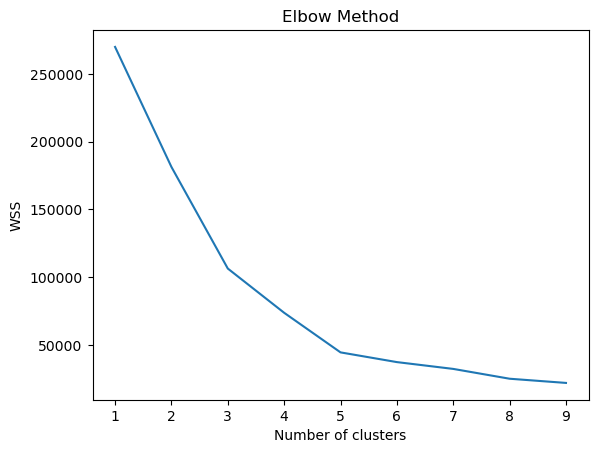

In [91]:
X = client_df[["Annual Income (k$)", "Spending Score (1-100)"]]

wss = []
for i in range(1, 10):
    client_kmeans = KMeans(n_clusters=i, init='k-means++', n_init=5)
    client_kmeans.fit(X)
    wss.append(client_kmeans.inertia_)

for i in range(1, 10):
    print("WSS for {} clusters: {}".format(i, wss[i-1]))


plt.figure()
plt.plot(range(1, 10), wss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()


**Question :** quel est le nombre de groupes qui est optimal d'après cette méthode ?

*Réponse :*
D'après la méthode du coude, on peut voir que le nombre optimal de clusters est 3 ou 5. Préférablement 5 car le WSS est plus bas.

Veuillez effectuer le groupement avec le nombre de groupes optimal et les paramètres indiqués pour cette section.  

Veuillez **afficher le résultat** avec le même format que dans la figure précédente.

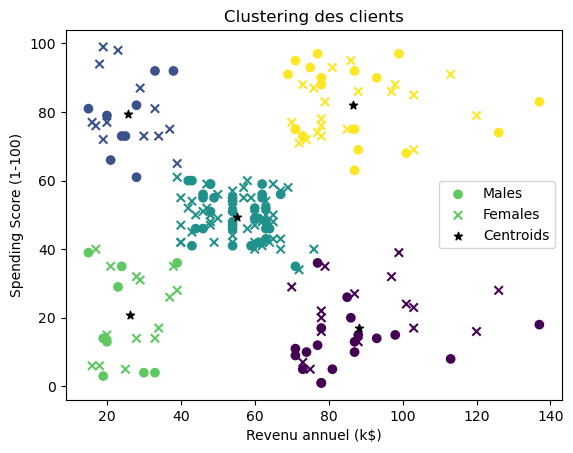

In [93]:
client_kmeans = KMeans(n_clusters=5, init='k-means++', n_init=5)
X = client_df[["Annual Income (k$)", "Spending Score (1-100)"]]
client_kmeans.fit(X)

# Predict cluster
client_df["Cluster"] = client_kmeans.predict(X)
centroids = client_kmeans.cluster_centers_

# Split dataframe into Male and Female
male_df = client_df[client_df["Gender"] == "Male"]
female_df = client_df[client_df["Gender"] == "Female"]


plt.figure()
plt.scatter(male_df["Annual Income (k$)"], male_df["Spending Score (1-100)"], c=male_df["Cluster"], marker="o", label="Males")
plt.scatter(female_df["Annual Income (k$)"], female_df["Spending Score (1-100)"], c=female_df["Cluster"], marker="x", label="Females")
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', label='Centroids')
plt.title("Clustering des clients")
plt.xlabel("Revenu annuel (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

**Question :** comment se compare ce groupement à celui obtenu au 2b ?

*Réponse :*

Les clusters obtenus sont similaires à ceux obtenus avec la méthode de l'initialisation aléatoire. Ils ont cependant l'avantage d'être plus stables et de donner des résultats plus cohérents grace à l'initialisation k-means++

Veuillez calculer le nombre de femmes et d'hommes, respectivement, dans chaque groupe.  Dans quels groupes y a-t-il plus d'hommes que de femmes, et quelles sont les propriétés de ces groupes (revenu, score) ?

In [95]:
for i in range(0, 5):
    print("Cluster {}:".format(i))
    print(client_df[client_df["Cluster"] == i]["Gender"].value_counts())
    print()


Cluster 0:
Gender
Male      19
Female    16
Name: count, dtype: int64

Cluster 1:
Gender
Female    13
Male       9
Name: count, dtype: int64

Cluster 2:
Gender
Female    48
Male      33
Name: count, dtype: int64

Cluster 3:
Gender
Female    14
Male       9
Name: count, dtype: int64

Cluster 4:
Gender
Female    21
Male      18
Name: count, dtype: int64



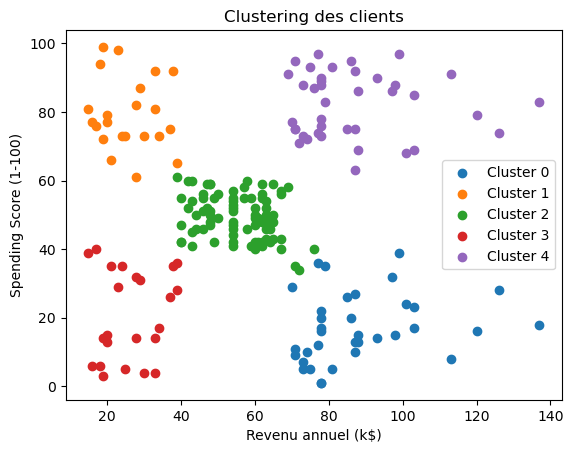

In [96]:
# Split des clusters
cluster_df = []
for i in range(0, 5):
    cluster_df.append(client_df[client_df["Cluster"] == i])

# Affichage des clusters
plt.figure()
for i in range(0, 5):
    plt.scatter(cluster_df[i]["Annual Income (k$)"], cluster_df[i]["Spending Score (1-100)"], label="Cluster {}".format(i))
plt.title("Clustering des clients")
plt.xlabel("Revenu annuel (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()



- On note que dans la plupart des clusters, il y a plus de femmes que d'hommes.
- Sauf pour un cluster (revenu élevé et spending-score bas) où il y a légerement plus d'hommes que de femmes (19 hommes et 16 femmes).
- À noter qu'il y a plus de femmes que d'hommes dans le dataset initial (112 femmes pour 88 hommes).

### 3b. Groupement utilisant 3 attributs

Veuillez utiliser à partir de maintenant aussi l'attribut de l'âge.  Veuillez déterminer le nombre optimal de groupes par la méthode du coude, et garder l'initialisation k-means++ avec 5 exécutions.  Dans cette section, on vous demande aussi d'afficher les groupes en 3D.

WSS for 1 clusters: 308812.7800000001
WSS for 2 clusters: 212840.16982097193
WSS for 3 clusters: 143342.75157170597
WSS for 4 clusters: 104366.151455562
WSS for 5 clusters: 75363.74835182933
WSS for 6 clusters: 58302.40630860365
WSS for 7 clusters: 51527.73675738672
WSS for 8 clusters: 44312.468812077226
WSS for 9 clusters: 40909.52838038773


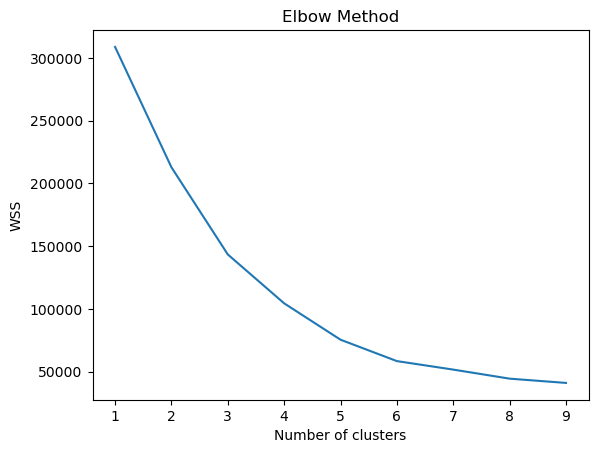

In [98]:
X = client_df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

wss = []
for i in range(1, 10):
    client_kmeans = KMeans(n_clusters=i, init='k-means++', n_init=5)
    client_kmeans.fit(X)
    wss.append(client_kmeans.inertia_)

for i in range(1, 10):
    print("WSS for {} clusters: {}".format(i, wss[i-1]))


plt.figure()
plt.plot(range(1, 10), wss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()


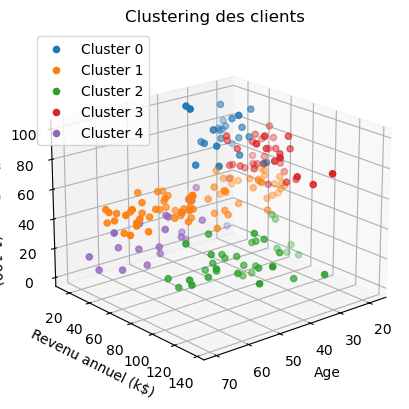

In [99]:
# Nous allons utiliser 5 clusters pour bien distinguer les différences avec les points précédents, mais 6 clusters serait aussi intéressant.

client_kmeans = KMeans(n_clusters=5, init='k-means++', n_init=5)
X = client_df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
client_kmeans.fit(X)

# Predict cluster
client_df["Cluster"] = client_kmeans.predict(X)

# Split des clusters
cluster_df = []
for i in range(0, 5):
    cluster_df.append(client_df[client_df["Cluster"] == i])

# Affichage 3D des clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, 5):
    ax.scatter(cluster_df[i]["Age"], cluster_df[i]["Annual Income (k$)"], cluster_df[i]["Spending Score (1-100)"], label="Cluster {}".format(i))
ax.set_xlabel("Age")
ax.set_ylabel("Revenu annuel (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.title("Clustering des clients")
plt.legend()

# Set the azimuth and elevation angles
ax.view_init(azim=50, elev=20)

plt.show()


**Question :** comment se compare ce groupement à celui obtenu au 2b ?

- Grâce à la visualisation 3D, on peut voir que les clusters sont similaires à ceux obtenus avec les 2 premiers attributs.

- Cependant, on peut noter que 2 clusters concernent des clients plus jeunes que les autres clusters (ceux avec les spending score les plus élevés).

**Question :** serait-il difficile d'ajouter le paramètre 'Gender' (avec les valeurs 'Male' et 'Female') comme 4e attribut pour effectuer le groupement ?  Veuillez discuter la pertinence de cette idée.

- Pour cela, il faudrait changer les valeurs string en valeurs binaires pour pouvoir les utiliser dans le modèle
- Ensuite il faudrait créer un modèle utilisant ces 4 attributs pour prédire le cluster. Mais cela ne serait pas très utile, car les clusters actuels ont une répartition assez équilibrée entre les genres, ce qui rendrait la prédiction difficile.
- De plus, les clusters actuels sont déjà assez distincts et permettent de bien distinguer les différents types de clients

***
**Fin du Labo 1.**  Veuillez nettoyer ce notebook en gardant seulement les réponses et résultats désirés, l'enregistrer en remplaçant 'student' par votre nom, et le soumettre sur Cyberlearn.